Polynomial Regression
==========

In this week's programming exercise, you are asked to implement the basic building blocks for polynomial regression step-by-step. We will do the following:


- **a)** Load a very simple, noisy dataset and inspect it.
- **b)** Construct a design matrix for polynomial regression of degree m: the Vandermonde matrix.
- **c)** Calculate the Moore-Penrose pseudoinverse of the design matrix.
- **d)** Calculate a vector of coefficients that minimizes the squared error of an n-degree polynomial on our given set of measurements (data).
- **e)** Use this coefficient (weight) vector to construct a polynomial that predicts the underlying function the noisy data is drawn from.
- **f)** With the work we have done before, we look at a polynomials of different degrees we fit using the provided data.


Before you start, make sure that you have downloaded the file *poly_data.csv* from stud.ip and put it in the same folder as this notebook! You are supposed to implement the functions yourself!

In [93]:
# the usual imports.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a)
------------
1. Use the numpy function **loadtxt** to load the data from *poly_data.csv* into a variable data. Data should now be a $n\times n$ **ndarray** matrix. You can check the type and size of data yourself using the **type** function and the **shape** attribute of the matrix.
2. The first row and second row correspond to the [independent and dependent variable](https://en.wikipedia.org/wiki/Dependent_and_independent_variables) respectively. Store them in two different, new variables **X** (independent) and **Y** (dependent).
3. Use a scatterplot to take a look at the data. It has been generated by sampling a function $f$ and adding Gaussian noise:
\begin{align}
y_i &= f(x_i) + \epsilon \\
\epsilon &\sim \mathcal{N}(0, \sigma^2)
\end{align}

You can use execute the second cell below to take a look at $f(x)$.

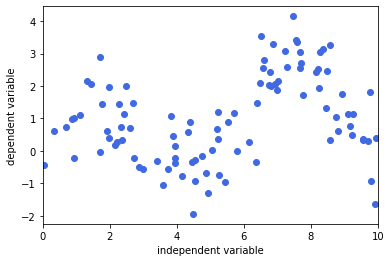

In [114]:
# ~~ your code for a) here ~~
data = np.loadtxt('poly_data.csv', delimiter = ',') #load data from csv data points are seperated by a ","" "
X = data[0] #store independent variables in X
Y = data[1] #store dependent variable in Y

plt.plot(X,Y,'o',color = "royalblue") 
# setting and labeling your axis
plt.ylabel('dependent variable')
plt.xlabel('independent variable')
plt.xlim((0,10));

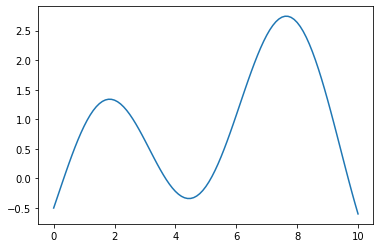

In [5]:
# Taking a loog at f(x)
def target_func(x):
    return 1.5*np.sin(x) - np.cos(x/2) + 0.5

x = np.linspace(0,10, 101)
y = target_func(x)
plt.plot(x,y);

b) 
--------

In the lecture, you have derived the formula for linear regression with arbitrary basis functions and normal distributed residuals $\epsilon$. Here, we choose polynomial basis functions and therefore will try and approximate the function above via a polynomial of degree $m$:
$$y = \alpha_0 + \alpha_1x + \alpha_2x^2 + \alpha_3x^3 + \dots + \alpha_mx^m + \epsilon$$
Due to our choice of basis functions, this is called polynomial regression.

The simplest version of polynomial regression uses monomial basis functions $\{1, x, x^2, x^3, \dots \}$ in the design matrix. Such a matrix is called the [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) in linear algebra. Implement a function that takes the observed, independent variables $x_i$ stored in **X** and constrcuts a design matrix of the following form:

$$ \Phi = \begin{bmatrix} 1 & x_1 & x_1^2 & \dots & x_1^m \\ 1 & x_2 & x_2^2 & \dots & x_2^m \\ 1 & x_3 & x_3^2 & \dots & x_3^m \\ \vdots & \vdots & \vdots & & \vdots \\ 1 & x_n & x_n^2 & \dots & x_n^m \end{bmatrix}$$

We have provided the function's doc string as well as two quick lines that test your implementation in the notebook cell below.

In [128]:
def poly_dm(x, m):
    """
    Generate a design matrix with monomial basis functions.
    
    Parameters
    ----------
    x : array_like
        1-D input array.
    m : int
        degree of the monomial used for the last column.
    
    Returns
    -------
    phi : ndarray
        Design matrix.
        The columns are ``x^0, x^1, ..., x^m``.
    """
    # create an array of shape length of input vector x m and fill it with zero
    #note: we use m + 1 because the amount of rows needs to be degree + the first row
    design_matrix = np.zeros((len(x),m+1)) 
      
    for i in range(m+1): #fill all rows with the same data set (complete values each row)
       design_matrix[:,i] = x

    design_matrix[:,0] = 1 #change all entries of row 0 to 1

    for index, x in np.ndenumerate(design_matrix): # for all entries x with the index(column,row)
       exponent = index[1]   # we set the variable exponent to entry 1 of the index -> row_nr or degree
       design_matrix[index] = x ** exponent #the entry at this index is now the original entry to the power of the row_nr
        
    return design_matrix #return the design matrix
try:
    print('poly_dm:',(lambda a=np.random.rand(10):'O.K.'if np.allclose(poly_dm(a,3),np.vander(a,4,True))else'Something went wrong! (Your result does not match!)')())
except:
    print('poly_dm: Something went horribly wrong! (an error was thrown)')
example_array = np.array([1,2,3,4,5])   
poly_dm(example_array,3)

poly_dm: O.K.


array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

c)
--------

According to the lecture, it is quite usefull to calculate the Moore-Penrose pseudoinverse $A^\dagger$ of a matrix:
$$ A^\dagger = (A^T A)^{-1}A^T$$
where $M^T$ means transpose of matrix $M$ and $M^{-1}$ denotes its inverse.

According to the docstring in the cell below, implement a function that returns $A^\dagger$ for a matrix $A$, and test your implementation against the small test that is included.

In [116]:
def pseudoinverse(A):
    """
    Compute the (Moore-Penrose) pseudo-inverse of a matrix.
    
    Parameters
    ----------
    A : (M, N) array_like
      Matrix to be pseudo-inverted.
      
    Returns
    -------
    A_plus : (N, M) ndarray
      The pseudo-inverse of `a`.
    """
    #print("Our original design-matrix:")
    #print(A)
    
    #print("Transposed:")
    A_transposed = A.transpose()
    #print(A_transposed)
    
    #Matrix product of A and A_transposed:
    A_to_be_inversed = np.matmul(A_transposed,A)
    #print("Matrix product of A and A_transposed:")
    #print(A_to_be_inversed)
    
    #The inverse of the Matrix product
    A_inversed = np.linalg.inv(A_to_be_inversed)
    #print("The inverse of the Matrix product")
    #print(A_inversed)
    
    #The Resulting pseudo_inverse of our given matrix
    pseudo_inverse = np.matmul(A_inversed, A_transposed)
    #print("The Resulting pseudo_inverse of our given matrix")
    #print(pseudo_inverse)
    
    return pseudo_inverse

# the lines below test the pseudo_inverse function
try:
    print('pseudo_inverse:',(lambda m=np.random.rand(9,5):'Good Job!'if np.allclose(pseudoinverse(m),np.linalg.pinv(m))else'Not quite! (Your result does not match!)')())
except:
    print('pseudo_inverse: Absolutely not! (an error was thrown)')
    


pseudo_inverse: Good Job!


d)
-------
To estimate the parameters $\alpha_i$ up to a chosen degree $m$, we use call the vector containing all the $\alpha_i$ $w$ and solve the following formula presented in class:
\begin{align}
y &= \Phi w \\
w &= \Phi^\dagger y
\end{align}
where $\Phi$ is the design matrix and $\Phi^\dagger$ its pseudoinverse and $y$ is the vector of dependent variables we observed in our dataset and stored in **Y**.

Implement a function that calculates $w$ according to the docstring given below. Again, a short test of your implementation is provided.

In [119]:
def poly_regress(x, y, deg):
    """
    Least squares polynomial fit.
    
    Parameters
    ----------
    x : array, shape (M,)
        x-coordinates of the M sample points.

    y : array, shape (M,)
        y-coordinates of the sample points.
    
    deg : int
        Degree of the fitting polynomial.
    
    Returns
    -------
    w : array, shape (deg+1,)
        Polynomial coefficients, highest power last.
    """
    # variable to store our design matrix
    design_matrix = poly_dm(x, deg)
    
    #variavle to store our pseudo_inverse
    inverse_dm = pseudoinverse(design_matrix)
    
    # variable to store the parameters
    # parameters (beta-coefficients) are calculated by the Matrix product of our dm and it`s pseudo-inverse
    our_parameters = np.matmul(inverse_dm,y)
    
    #print("The Parameters are")
    #print(our_parameters)
    
    return our_parameters

# the lines below test the poly_regress function
try:
    print('poly_regress:',(lambda a1=np.random.rand(9),a2=np.random.rand(9):'Ace!'if 
                           np.allclose(poly_regress(a1,a2,2),np.polyfit(a1,a2,2)[::-1])else'Almost! (Your result does not match!)')())
except:
    print('poly_regress: Not nearly! (an error was thrown)')

poly_regress: Ace!


e)
--------
The last function we will write will use the vector of coefficients we can now calculate to construct a polynomial function and evaluate it at any point we choose to. Remember, the form of this polynomial is given by:
$$y = \alpha_0 + \alpha_1x + \alpha_2x^2 + \alpha_3x^3 + \dots + \alpha_mx^m$$

This is the model we assumed above, but we do not need to include the noise term here! Again, the function is specified in a docstring and tested in the little {try - catch} block below. *Hint:* The order of the polynomial you need to calculate is inherently given by the length of **w**, the number of coefficients. 


In [121]:
def polynom(x, w):
    """ Evaluate a polynomial.
    
    Parameters
    ----------
    x : 1d array
        Points to evaluate.
    
    w : 1d array
        Coefficients of the monomials.
    
    Returns
    -------
    y : 1d array
        Polynomial evaluated for each cell of x.
    """
    y_values = np.zeros(len(x)) #create an array containing with the same length as x 
    for i in range(len(x)): # for every entry in x 
        for j in range(len(w)): # for every value(beta-coefficient) in our vector w
            y_values[i] += w[j] * (x[i]**j) # the corresponding y value is the sum of all beta-coefficients times the x value to the power of j
      
    return y_values # retunr the y values

# the lines below test the polynom function
try:
    print('polynom:',(lambda a1=np.random.rand(9),a2=np.random.rand(9):'OK'if np.allclose(polynom(a1,a2),np.polyval(a2[::-1],a1))else'Slight failure! (Your result does not match!)')())
except:
    print('polynom: Significant failure! (an error was thrown)')

polynom: OK


f)
------
f, as in finally. We can now use all the functions we have written above to investigate how well a polynomial of a degree $m$ fits the noisy data we are given. For $m \in \{1,2,10\}$, estimate a polynomial function on the data. Evaluate the three functions on a vector of equidistant points between 0 and 10 (*linearly spaced*). Additionally, plot the original target function $f(x)$, as well as the scatter plot of the data samples. Make sure every graph and the scatter appear in the same plot. Label each graph by adding a label argument to the **plt.plot** function. This allows the use of the **legend()** function and makes the plot significantly more understandable!

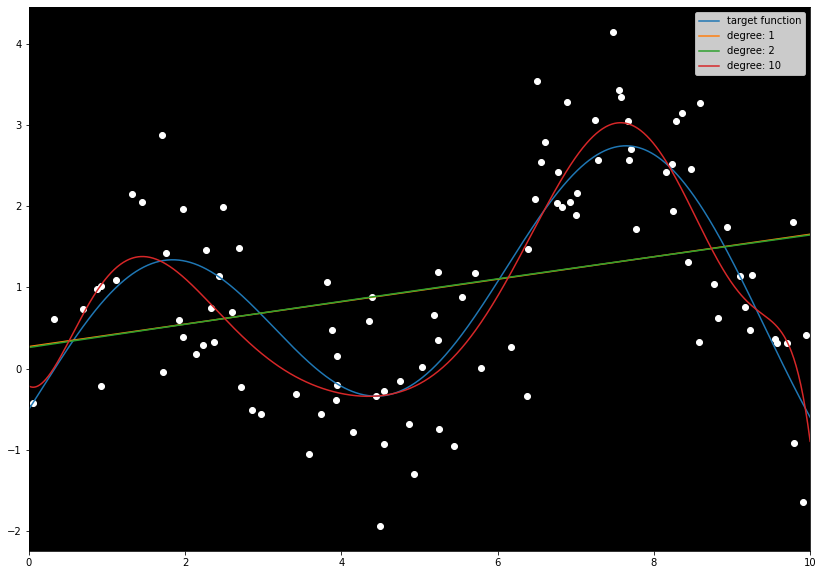

In [120]:
plt.figure(figsize = (14, 10))

generated_numbers = np.linspace(0, 10, 1001) # generates 1000 evenly spaced number between 0 and 10
target_function = target_func(generated_numbers) # variable to store given target function

plt.scatter(X, Y, color = "white") #generate scatter plot with white dots
plt.plot(generated_numbers, target_function, label = 'target function') #plot target function with our generated numbers
ax = plt.gca() #select graph axis (used for backgroundcolor)
ax.set_facecolor("black") #set background color to black

for degree in [1,2,10]: # generate our polynomial given our data_set for degree 1, 2 and 10
    w = poly_regress(X, Y, degree) # call above defined functions
    y = polynom(generated_numbers, w)
    plt.plot(generated_numbers, y, label = 'degree: ' + str(degree)) # plot polynomials and add labels for the legend
    
    """
    for degree in [5]:
    w = poly_regress(X, Y, degree)
    y = polynom(generated_numbers, w)
    plt.plot(generated_numbers, y, label = 'degree: ' + str(degree))
    """    
    
plt.xlim((0, 10)) # zoom in
plt.legend(); # show legend